# DS6040 Project: Climate Change Analysis  
#### Abigail Snyder, Elena Tsvetkova, Suraj Kunthu

## Introduction

The purpose of this analysis is to discover demographic influences on opinions on climate change, in order to potentially inform strategies for education and policy as regards climate change and protecting the environment. 

## Climate Change Data

The chosen data set is survey data from Yale Program on Climate Change Communication & George Mason University Center for Climate Change Communication. The survey data catalogs American adults (age 18 and over) and their beliefs, attitudes, and policy opinions regarding global warming from 2008 through 2022. The data includes demographic data from the U.S. Census regarding gender, race and ethnicity, and level of education.  

All of the data is in categorical form and stored as a .SAV file. There is a Survey Methods pdf which functions as a codebook for the data.  

The total weighted sample size of the entire dataset is (n=30,136).  

There are 30,136 observations and 54 features. 

## Problem Statement

The key question which we aimed to answer in this study is: **What is the probability that demographic data, such as income, age, gender, and education determines opinions on climate change?**

## Methods & Approach

We started by importing the data and doing some exploratory data analysis, which led us to make a few conclusions:

In [80]:
import pyreadstat
import pandas as pd
from ydata_profiling import ProfileReport
import sidetable
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Exploratory Data Analysis

In [2]:
df = pd.read_spss('spssdata.sav')

In [3]:
df.head()

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,...,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
0,2.0,Nov 2008,2008,0.54,0.269626,Yes,Caused mostly by human activities,,Caused mostly by human activities,Most scientists think global warming is happening,...,Not working - retired,Not head of household,3.0,0.0,0.0,0.0,0.0,3.0,One-family house detached from any other house,Owned by you or someone in your household
1,3.0,Nov 2008,2008,0.85,0.424411,Don't know,Caused mostly by human activities,,Caused mostly by human activities,Don't know enough to say,...,Not working - disabled,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,Mobile home,Rented
2,5.0,Nov 2008,2008,0.49,0.244660,Don't know,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,...,Not working - looking for work,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
3,6.0,Nov 2008,2008,0.29,0.144799,Yes,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Most scientists think global warming is happening,...,Not working - retired,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
4,7.0,Nov 2008,2008,1.29,0.644106,Yes,Caused mostly by human activities,,Caused mostly by human activities,There is a lot of disagreement among scientist...,...,Working - as a paid employee,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household


In [4]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [5]:
df.weight_wave

0        0.5400
1        0.8500
2        0.4900
3        0.2900
4        1.2900
          ...  
30131    1.4848
30132    0.8351
30133    1.0979
30134    0.6474
30135    0.7348
Name: weight_wave, Length: 30136, dtype: float64

In [6]:
df.stb.freq(['party'])

,party,count,percent,cumulative_count,cumulative_percent
0,Democrat,9903,32.861030,9903,32.861030
1,Republican,8336,27.661269,18239,60.522299
2,Independent,7737,25.673613,25976,86.195912
3,No party/not interested in politics,2992,9.928325,28968,96.124237
4,Other; Please specify:,859,2.850411,29827,98.974648
5,Refused,309,1.025352,30136,100.000000


In [7]:
df.stb.freq(['income_category'])

,income_category,count,percent,cumulative_count,cumulative_percent
0,"Less than $50,000",10953,36.345235,10953,36.345235
1,"$50,000 to $99,999",10107,33.537961,21060,69.883196
2,"$100,000 or more",9076,30.116804,30136,100.000000


In [8]:
df.stb.freq(['happening'])

,happening,count,percent,cumulative_count,cumulative_percent
0,Yes,20438,67.819220,20438,67.819220
1,Don't know,4935,16.375763,25373,84.194983
2,No,4689,15.559464,30062,99.754447
3,Refused,74,0.245553,30136,100.000000


In [9]:
pd.Series(df[['happening','weight_wave']].groupby('happening').sum()['weight_wave'])/df['weight_wave'].sum()

happening
Don't know    0.171526
No            0.144361
Refused       0.002745
Yes           0.681367
Name: weight_wave, dtype: float64

In [10]:
#profile= ProfileReport(df, 
#                        title='Pandas Profiling Report',
#                        html={'style':{'full_width':True}},
#                       minimal=False)
#profile.to_notebook_iframe()

In [11]:
(pd.crosstab(df.income_category, df.happening, normalize='columns')*100).round(2)

happening,Don't know,No,Refused,Yes
income_category,,,,
"$100,000 or more",23.83,29.94,20.27,31.71
"$50,000 to $99,999",32.32,36.08,29.73,33.26
"Less than $50,000",43.85,33.97,50.00,35.03


In [12]:
(pd.crosstab(df.party, df.happening, normalize='columns')*100).round(2)

happening,Don't know,No,Refused,Yes
party,,,,
Democrat,19.31,6.72,12.16,42.21
Independent,23.99,24.82,10.81,26.33
No party/not interested in politics,17.63,6.40,8.11,8.89
Other; Please specify:,2.31,5.61,2.70,2.35
Refused,1.50,0.92,56.76,0.73
Republican,35.26,55.53,9.46,19.50


In [13]:
(pd.crosstab(df.ideology, df.happening, normalize='columns')*100).round(2)

happening,Don't know,No,Refused,Yes
ideology,,,,
"Moderate, middle of the road",42.82,22.18,17.57,43.19
Refused,3.55,1.56,60.81,1.46
Somewhat conservative,29.60,37.21,9.46,16.74
Somewhat liberal,7.15,4.07,2.70,23.63
Very conservative,13.56,34.08,6.76,5.11
Very liberal,3.32,0.90,2.70,9.86


In [3]:
df['happening'] = df['happening'].astype('category')
df['happening'] = df['happening'].cat.reorder_categories(['Yes', 
                                                            'No', 
                                                            "Don't know", 
                                                            'Refused'])
mybars = df.happening.value_counts().sort_index()
mybars


happening
Yes           20438
No             4689
Don't know     4935
Refused          74
Name: count, dtype: int64

Text(0.5, 1.0, 'Level of Agreement that Global Warming is Happening')

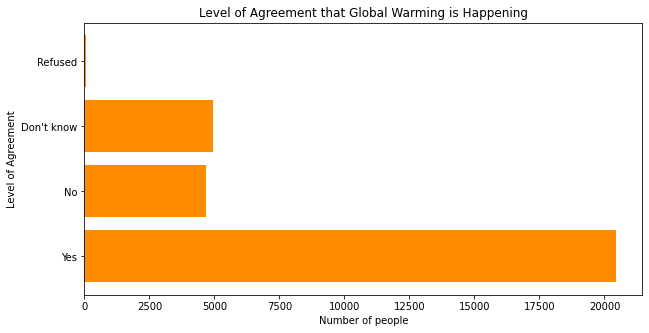

In [15]:
plt.figure(figsize=(10, 5))
plt.barh(mybars.index, mybars.values, color='darkorange')
plt.ylabel('Level of Agreement')
plt.xlabel('Number of people')
plt.title('Level of Agreement that Global Warming is Happening')

In [4]:
df['worry'] = df['worry'].astype('category')
df['worry'] = df['worry'].cat.reorder_categories(['Very worried', 
                                                  'Somewhat worried', 
                                                  'Not very worried', 
                                                  'Not at all worried',
                                                  'Refused'])
mybars = df.worry.value_counts().sort_index()
mybars


worry
Very worried           5531
Somewhat worried      11844
Not very worried       7626
Not at all worried     5052
Refused                  83
Name: count, dtype: int64

Text(0.5, 1.0, 'Level of Worry about Global Warmning')

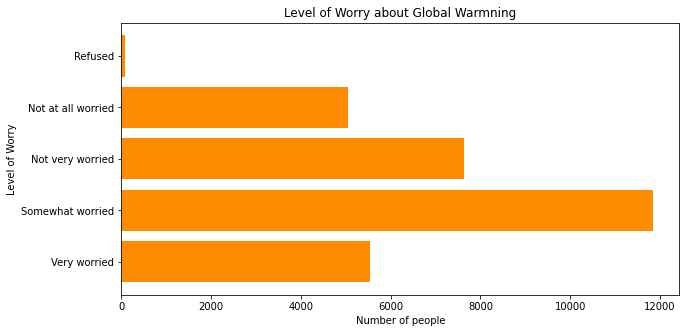

In [17]:
plt.figure(figsize=(10, 5))
plt.barh(mybars.index, mybars.values, color='darkorange')
plt.ylabel('Level of Worry')
plt.xlabel('Number of people')
plt.title('Level of Worry about Global Warmning')

### Preliminary Thoughts

Based on the exploratory data analysis, we decided to start by creating a model with `happening` as the response variable, and to trim down the predictor variables to those we are most interested in: `gender`, `age_category`, `educ_category`, `income_category`, `race`, `ideology`, `party`, `region4`, `religion`, and `marit_status`.  

`happening` contains four categories: 'Yes', 'No', 'Don't Know,' and 'Refused.' In order to create a binary response variable, we considered dropping 'Refused,' and potentially combining 'No' and 'Don't Know'. Before doing this, we wanted to explore the options for doing logistic regression with more than two categories in the response variable.  

If we have time, we would like to compare this with a second model using the same predictor variables, but with the response variable `worry`. 

In [5]:
df2 = df[['happening', 'gender', 'age_category', 'educ_category', 'income_category', 'race', 'ideology', 'party', 'region4', 'religion', 'marit_status']]

In [19]:
df2.head()

,happening,gender,age_category,educ_category,income_category,race,ideology,party,region4,religion,marit_status
0,Yes,Female,55+ years,High school,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Widowed
1,Don't know,Male,35-54 years,Less than high school,"Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Never married
2,Don't know,Female,35-54 years,Bachelor's degree or higher,"Less than $50,000",Hispanic,Somewhat conservative,Republican,West,Mormon,Married
3,Yes,Male,55+ years,Bachelor's degree or higher,"$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Married
4,Yes,Female,18-34 years,Some college,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,Baptist - any denomination,Married


In [6]:
#drop rows with NA values
df2 = df2.dropna(axis=0)

In [7]:
df3 = df[['worry', 'gender', 'age_category', 'educ_category', 'income_category', 'race', 'ideology', 'party', 'region4', 'religion', 'marit_status']]

In [22]:
df3.head()

,worry,gender,age_category,educ_category,income_category,race,ideology,party,region4,religion,marit_status
0,Somewhat worried,Female,55+ years,High school,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Widowed
1,Not very worried,Male,35-54 years,Less than high school,"Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Never married
2,Not at all worried,Female,35-54 years,Bachelor's degree or higher,"Less than $50,000",Hispanic,Somewhat conservative,Republican,West,Mormon,Married
3,Somewhat worried,Male,55+ years,Bachelor's degree or higher,"$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Married
4,Somewhat worried,Female,18-34 years,Some college,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,Baptist - any denomination,Married


### Model-Building

With this in mind, we started with the model-building process, working our way through several different models and comparing them to see what would be the best fit for the data. 

#### Question 1: What is the probability that certain demographic markers affect a person's belief that global warming is happening?

#### Model One: One-Hot Encoding 
The first model attempted to use one-hot encoding to create dummy variables to allow for the four categories within the response variable `happening`. 

In [8]:
one_hot_encoded_data = pd.get_dummies(df2, columns = ['happening'])
one_hot_encoded_data.head()

,gender,age_category,educ_category,income_category,race,ideology,party,region4,religion,marit_status,happening_Yes,happening_No,happening_Don't know,happening_Refused
0,Female,55+ years,High school,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Widowed,True,False,False,False
1,Male,35-54 years,Less than high school,"Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Never married,False,False,True,False
2,Female,35-54 years,Bachelor's degree or higher,"Less than $50,000",Hispanic,Somewhat conservative,Republican,West,Mormon,Married,False,False,True,False
3,Male,55+ years,Bachelor's degree or higher,"$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Married,True,False,False,False
4,Female,18-34 years,Some college,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,Baptist - any denomination,Married,True,False,False,False


In [9]:
# importing libraries
from sklearn.preprocessing import OneHotEncoder 

In [25]:
df2.head(5)

,happening,gender,age_category,educ_category,income_category,race,ideology,party,region4,religion,marit_status
0,Yes,Female,55+ years,High school,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Widowed
1,Don't know,Male,35-54 years,Less than high school,"Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Never married
2,Don't know,Female,35-54 years,Bachelor's degree or higher,"Less than $50,000",Hispanic,Somewhat conservative,Republican,West,Mormon,Married
3,Yes,Male,55+ years,Bachelor's degree or higher,"$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Married
4,Yes,Female,18-34 years,Some college,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,Baptist - any denomination,Married


In [10]:
# Assigning numerical values and storing it in another columns
df2['happ_cat'] = df2['happening'].cat.codes
  
# Create an instance of One-hot-encoder
enc = OneHotEncoder()
  
# Passing encoded columns 
enc_data = pd.DataFrame(enc.fit_transform(
    df2[['happ_cat']]).toarray())
  
# Merge with main
df2_new = df2.join(enc_data)
  
df2_new.head()

,happening,gender,age_category,educ_category,income_category,race,ideology,party,region4,religion,marit_status,happ_cat,0,1,2,3
0,Yes,Female,55+ years,High school,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Widowed,0,1.0,0.0,0.0,0.0
1,Don't know,Male,35-54 years,Less than high school,"Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Never married,2,0.0,0.0,1.0,0.0
2,Don't know,Female,35-54 years,Bachelor's degree or higher,"Less than $50,000",Hispanic,Somewhat conservative,Republican,West,Mormon,Married,2,0.0,0.0,1.0,0.0
3,Yes,Male,55+ years,Bachelor's degree or higher,"$100,000 or more","White, Non-Hispanic",Somewhat conservative,Independent,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Married,0,1.0,0.0,0.0,0.0
4,Yes,Female,18-34 years,Some college,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,Baptist - any denomination,Married,0,1.0,0.0,0.0,0.0


In [27]:
df2_new['happ_cat'].value_counts()

happ_cat
0    18237
2     4521
1     4243
3       74
Name: count, dtype: int64

In [28]:
df2_new['happening'].value_counts()

happening
Yes           18237
Don't know     4521
No             4243
Refused          74
Name: count, dtype: int64

In [29]:
#initial attempt to use Bambi...

In [11]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [12]:
az.style.use("arviz-darkgrid")
random_seed = 1234

In [13]:
df3 = df2_new.rename(columns={0: 'yes', 1:'no',2:'dont_know',3:'refuse'}) 

In [33]:
df3.head(3)

,happening,gender,age_category,educ_category,income_category,race,ideology,party,region4,religion,marit_status,happ_cat,yes,no,dont_know,refuse
0,Yes,Female,55+ years,High school,"$50,000 to $99,999","White, Non-Hispanic",Somewhat conservative,Republican,South,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Widowed,0,1.0,0.0,0.0,0.0
1,Don't know,Male,35-54 years,Less than high school,"Less than $50,000","White, Non-Hispanic","Moderate, middle of the road",No party/not interested in politics,Midwest,"Protestant (e.g., Methodist, Lutheran, Presbyt...",Never married,2,0.0,0.0,1.0,0.0
2,Don't know,Female,35-54 years,Bachelor's degree or higher,"Less than $50,000",Hispanic,Somewhat conservative,Republican,West,Mormon,Married,2,0.0,0.0,1.0,0.0


In [14]:
df3['has_response'] = np.where(df3['refuse']==0, 1, 0)

In [35]:
df3.columns

Index(['happening', 'gender', 'age_category', 'educ_category',
       'income_category', 'race', 'ideology', 'party', 'region4', 'religion',
       'marit_status', 'happ_cat', 'yes', 'no', 'dont_know', 'refuse',
       'has_response'],
      dtype='object')

In [36]:
df3.dtypes

happening          category
gender             category
age_category       category
educ_category      category
income_category    category
race               category
ideology           category
party              category
region4            category
religion           category
marit_status       category
happ_cat               int8
yes                 float64
no                  float64
dont_know           float64
refuse              float64
has_response          int64
dtype: object

In [37]:
df3['yes'] = df3['yes'].astype(int)

In [38]:
df3.dtypes

happening          category
gender             category
age_category       category
educ_category      category
income_category    category
race               category
ideology           category
party              category
region4            category
religion           category
marit_status       category
happ_cat               int8
yes                   int64
no                  float64
dont_know           float64
refuse              float64
has_response          int64
dtype: object

In [21]:
df3['age_category'].value_counts()

age_category
55+ years      12370
35-54 years     8984
18-34 years     5721
Name: count, dtype: int64

In [22]:
df3['educ_category'].value_counts()

educ_category
Bachelor's degree or higher    9544
Some college                   7960
High school                    7539
Less than high school          2032
Name: count, dtype: int64

In [74]:
df3.columns

Index(['happening', 'gender', 'age_category', 'educ_category',
       'income_category', 'race', 'ideology', 'party', 'region4', 'religion',
       'marit_status', 'happ_cat', 'yes', 'no', 'dont_know', 'refuse',
       'has_response'],
      dtype='object')

In [ ]:
df3['happening']

In [76]:
df3 = df3.loc[(df3.happening == "Yes") | (df3.happening == "No"),:]

In [ ]:
az.plot_trace(results2)
az.plot_forest(results2)
az.summary(results2)

#### Train/Validation/Test split

In [84]:
train, test = train_test_split(df3, test_size=0.4,random_state=1)

In [85]:
df3.shape

(22480, 17)

In [86]:
train.shape

(13488, 17)

In [87]:
test.shape

(8992, 17)

#### Validating Priors - Bernoulli

#### Bambi's default priors

In [38]:
#train_model1 = bmb.Model("p(yes,has_response) ~ gender + age_category + educ_category + income_category + race + ideology + party + region4 + religion + marit_status", 
#                   data = train, 
#                   family="binomial")

random_seed = 1111

train_model1 = bmb.Model("yes['1'] ~ gender + age_category", 
                   data = train, 
                   family="bernoulli")

train_model1

       Formula: yes['1'] ~ gender + age_category
        Family: bernoulli
          Link: p = logit
  Observations: 18081
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 4.55)
            gender ~ Normal(mu: 0.0, sigma: 5.0004)
            age_category ~ Normal(mu: [0. 0.], sigma: [5.3066 5.019 ])

In [39]:
train_results1 = train_model1.fit(random_seed=random_seed)

Modeling the probability that yes==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, gender, age_category]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 153 seconds.


In [ ]:
train_model1.predict(train_results1, kind="pps")

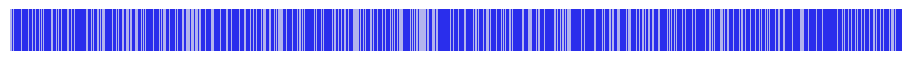

In [53]:
ax = az.plot_separation(train_results1, y='yes', figsize=(9,0.5))

#### Uniform priors

This is assuming the coeffiecients follow a uniform distribution with range -10 to 10. 


In [54]:
uniform_prior = bmb.Prior("Uniform", lower=-10,upper=10)
priors = {"Intercept":uniform_prior, "gender":uniform_prior,"age_category":uniform_prior}

train_model2 = bmb.Model("yes['1'] ~ gender + age_category", 
                   data = train, priors=priors,
                   family="bernoulli")

train_model2

       Formula: yes['1'] ~ gender + age_category
        Family: bernoulli
          Link: p = logit
  Observations: 18081
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Uniform(lower: -10.0, upper: 10.0)
            gender ~ Uniform(lower: -10.0, upper: 10.0)
            age_category ~ Uniform(lower: -10.0, upper: 10.0)

In [30]:
train_results2 = train_model2.fit(random_seed=random_seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, gender, age_category]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 145 seconds.


In [59]:
train_model2.predict(train_results2, kind="pps")

In [ ]:
ax = az.plot_separation(train_results2, y='yes', figsize=(9,0.5))

#### Model 1: Logistic regression model with Normal priors. ALL possible predictors

In [88]:
random_seed = 1111

In [89]:
train_model1 = bmb.Model("yes['1'] ~ gender + age_category + educ_category + income_category + race + ideology + party + region4 + religion + marit_status", 
                   data = train, 
                   family="bernoulli")

train_model1

       Formula: yes['1'] ~ gender + age_category + educ_category + income_category + race + ideology + party + region4 + religion + marit_status
        Family: bernoulli
          Link: p = logit
  Observations: 13488
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 9.3088)
            gender ~ Normal(mu: 0.0, sigma: 5.0)
            age_category ~ Normal(mu: [0. 0.], sigma: [5.3083 5.018 ])
            educ_category ~ Normal(mu: [0. 0. 0.], sigma: [5.6679 9.9517 5.474 ])
            income_category ~ Normal(mu: [0. 0.], sigma: [5.2643 5.2212])
            race ~ Normal(mu: [0. 0. 0.], sigma: [8.1456 9.8719 5.7021])
            ideology ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [21.1589  6.1762  6.229   8.1917  9.2036])
            party ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [ 5.7448  8.9414 14.5967 29.1427  5.6895])
            region4 ~ Normal(mu: [0. 0. 0.], sigma: [6.4396 5.2648 5.8706])
            religion ~ Normal(mu: [0. 0

In [98]:
train_results1 = train_model1.fit(random_seed=random_seed,idata_kwargs={"log_likelihood": True})
train_results1

Modeling the probability that yes==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, gender, age_category, educ_category, income_category, race, ideology, party, region4, religion, marit_status]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 531 seconds.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

#### Model 2: Logistic regression model with Normal priors, with select predictors:

We are selecting the following predictors:

educ_category and ideology to test how the simplified model performs compared to the more complex model. 

Belief of whether climate change is happening is well noted political topic that is often divided along party lines. However, more potential exposure to science education could offset some of the effects of political ideology.

In [99]:
train_model2 = bmb.Model("yes['1'] ~ educ_category + ideology", 
                   data = train, 
                   family="bernoulli")

train_model2

       Formula: yes['1'] ~ educ_category + ideology
        Family: bernoulli
          Link: p = logit
  Observations: 13488
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 4.019)
            educ_category ~ Normal(mu: [0. 0. 0.], sigma: [5.6679 9.9517 5.474 ])
            ideology ~ Normal(mu: [0. 0. 0. 0. 0.], sigma: [21.1589  6.1762  6.229   8.1917  9.2036])

In [100]:
train_results2 = train_model2.fit(random_seed=random_seed,idata_kwargs={"log_likelihood": True})
train_results2

Modeling the probability that yes==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, educ_category, ideology]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 176 seconds.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

#### Model Comparison with LOO cross validation

In [101]:
models_dict = {
    "model1": train_results1,
    "model2": train_results2
}
df_compare = az.compare(models_dict)
df_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model1,0,-4997.378975,45.974433,0.000000,0.931106,67.946761,0.000000,False,log
model2,1,-5224.408353,9.126264,227.029377,0.068894,67.751997,22.568917,False,log


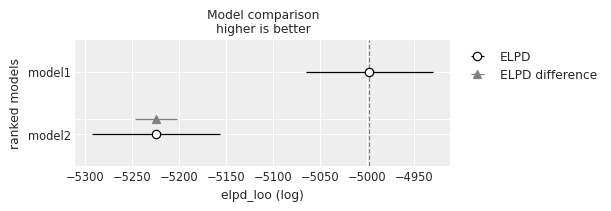

In [102]:
az.plot_compare(df_compare, insample_dev=False);

It appears that the first model with all predictors has a higher ELPD (expected log predictive density) and performs better than the simpler model. 

#### Summary results for model 1:

Gender:
Assuming all other variables are the same, there is a 23% reduction in belief that global warming is happening for men compared to women. 

Education category:
Completing college increases the odds that a person believes global warming is happening (hdi's do not overlap with zero, and the coeffiecients for some college/high school/less than high school is negative, meaning you are more likely to believe global warming is happening if complete college)

ideology:

There is a very clear pattern in ideology and climate change. Generally, when a person identifies as being somewhat/very liberal, they are more likely to believe global warming is happening, relative to moderates. In contrast, conservatives were much less likely to believe global warming is happening.

religion:

Even though it varies for some religions, belief in some religion is generally associated with a decreased chance in believing global warming is happening, relative to agnostics. Although the posterior mean for those claiming to be athiest is positive, the hdi did overlap with zero, suggesting the effect may be small relative to agnostics. This makes sense as both are not acknowledging a higher power. 

age:

Age appears to have little effect of whether person believes global warming is happening (hdi's overlap with zero).

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,4.114,0.261,3.636,4.607,0.006,0.004,1749.0,2346.0,1.0
gender[Male],-0.266,0.053,-0.364,-0.165,0.001,0.000,7163.0,2569.0,1.0
age_category[35-54 years],0.046,0.081,-0.092,0.203,0.001,0.001,4737.0,2997.0,1.0
age_category[55+ years],0.077,0.083,-0.074,0.234,0.001,0.001,4743.0,3300.0,1.0
educ_category[High school],-0.423,0.071,-0.562,-0.290,0.001,0.001,4412.0,3137.0,1.0
educ_category[Less than high school],-0.476,0.115,-0.690,-0.256,0.002,0.001,5451.0,3507.0,1.0
educ_category[Some college],-0.303,0.066,-0.426,-0.173,0.001,0.001,5382.0,3345.0,1.0
"income_category[$50,000 to $99,999]",0.067,0.065,-0.053,0.190,0.001,0.001,5737.0,3087.0,1.0
"income_category[Less than $50,000]",0.031,0.071,-0.100,0.166,0.001,0.001,5157.0,3365.0,1.0
race[Hispanic],-0.025,0.158,-0.323,0.261,0.002,0.002,4610.0,3339.0,1.0


C:\Users\elena\anaconda3\envs\ds6040\lib\site-packages\IPython\core\events.py:93: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


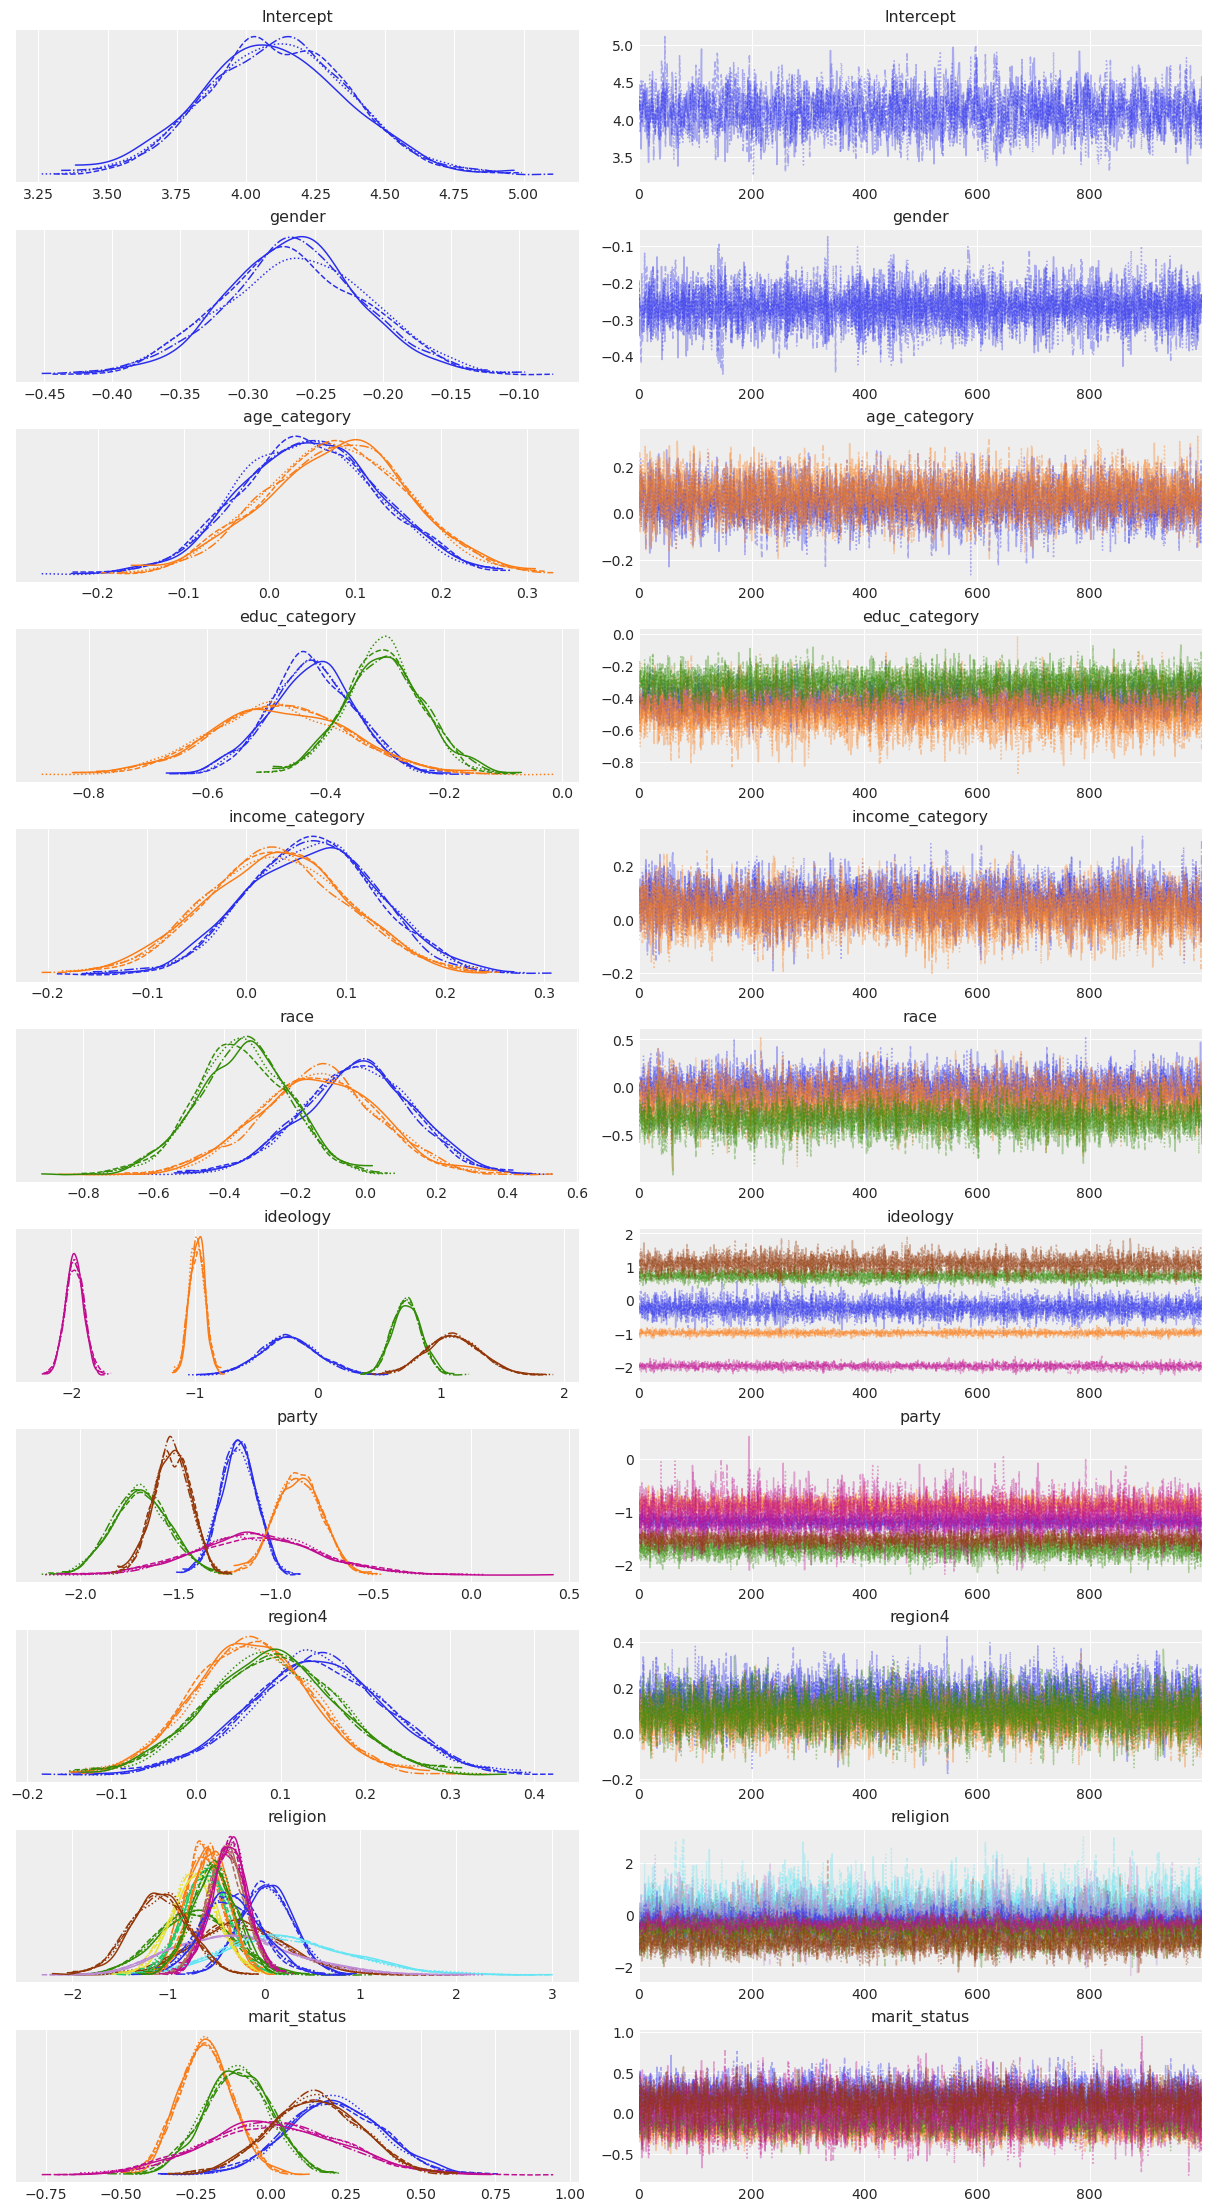

C:\Users\elena\anaconda3\envs\ds6040\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


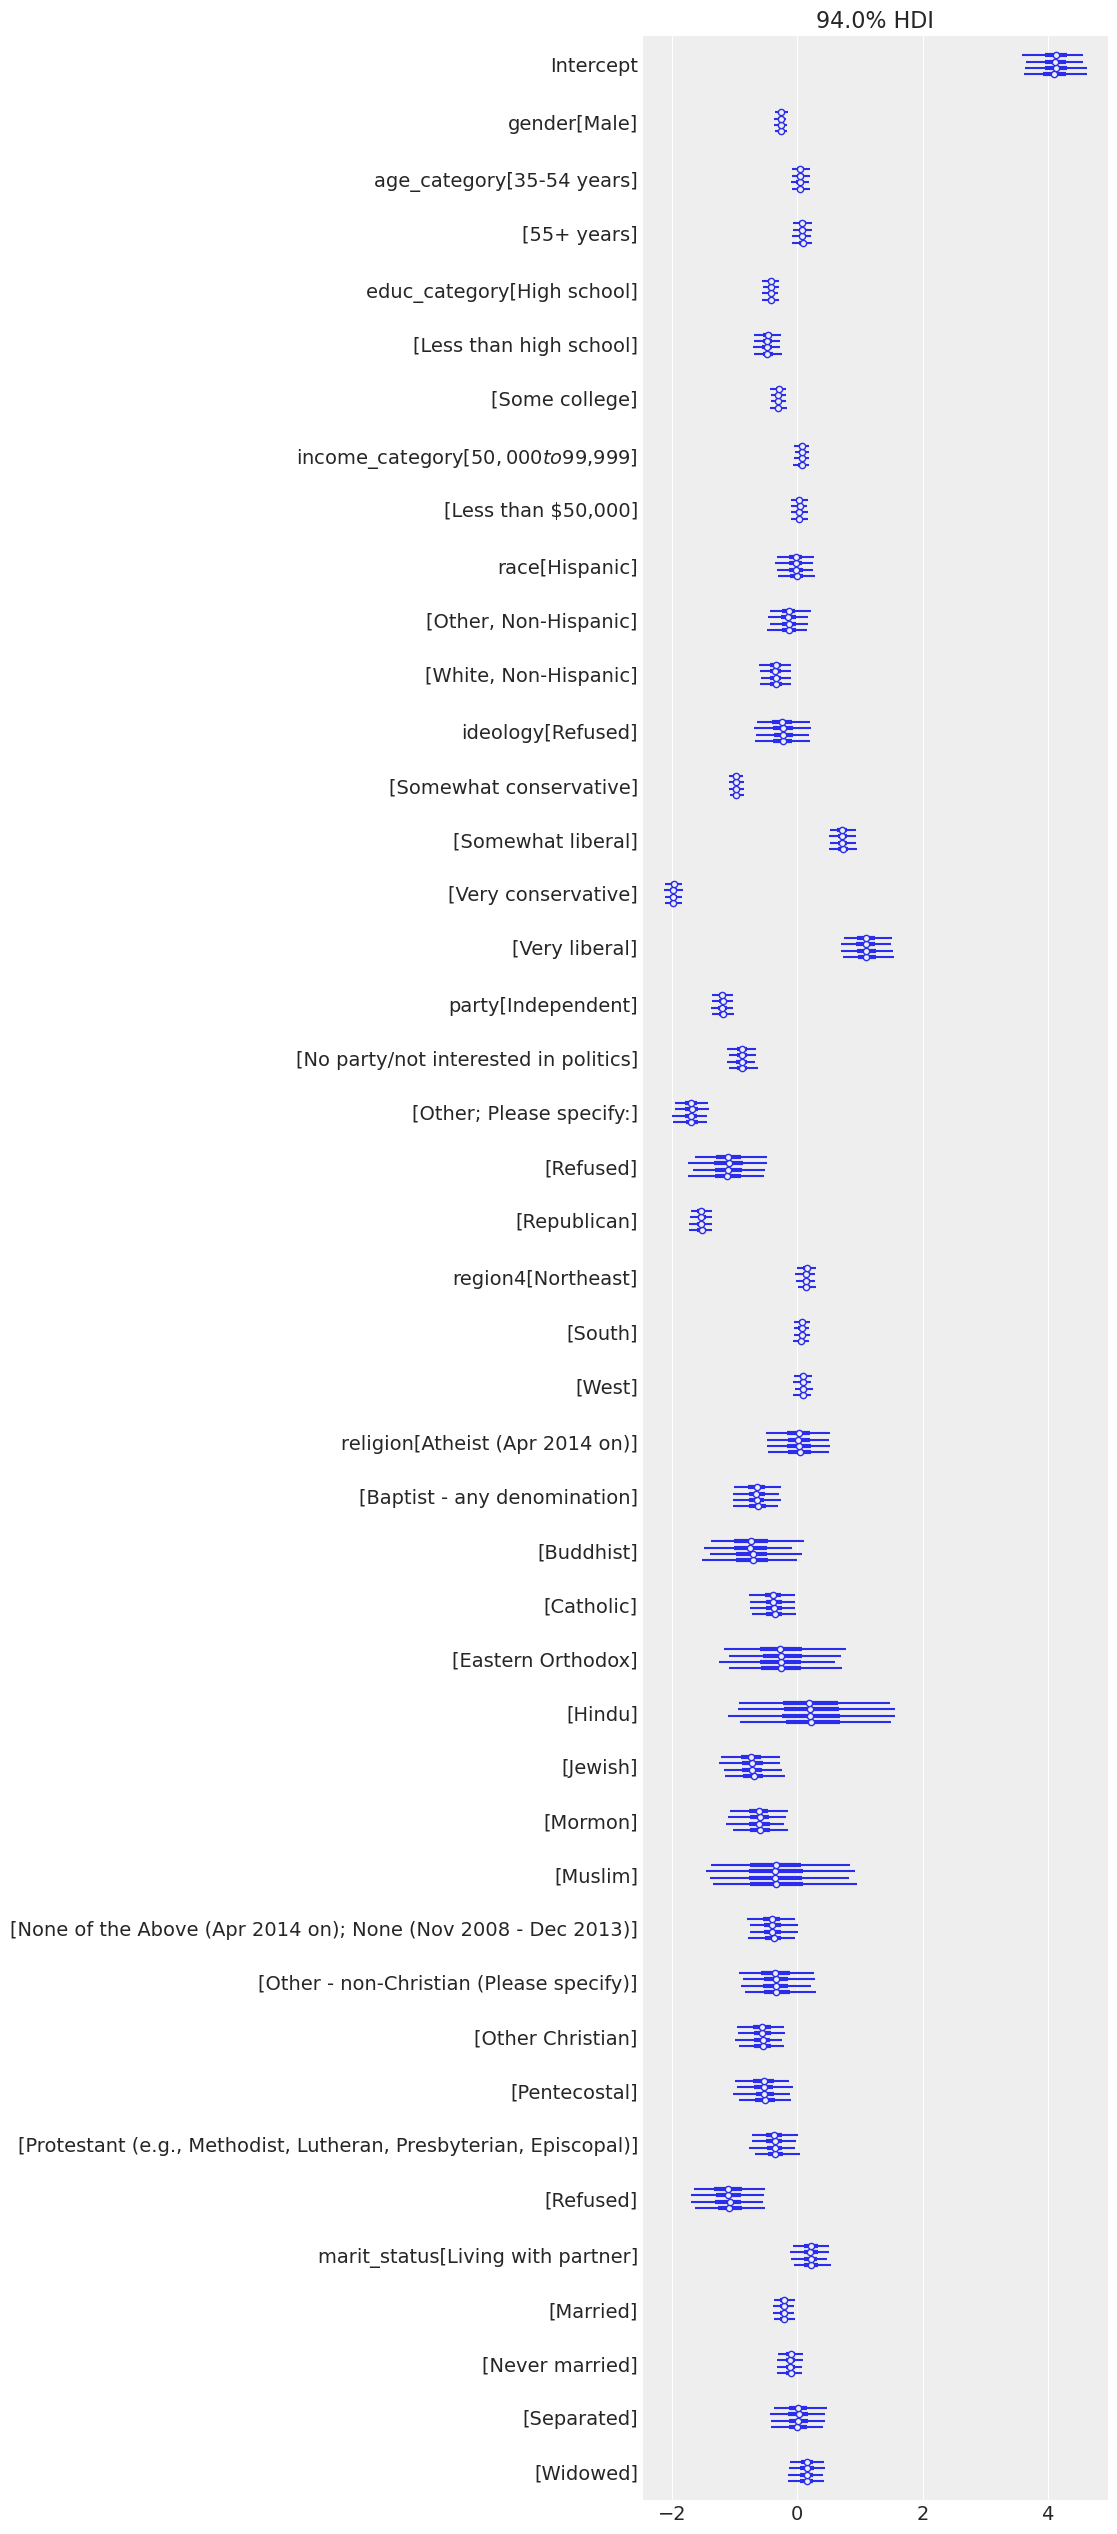

In [104]:
az.plot_trace(train_results1)
az.plot_forest(train_results1)
az.summary(train_results1)

#### Test Model 1 performance on test set

In [128]:
test['yes'].value_counts()

yes
1.0    7273
0.0    1719
Name: count, dtype: int64

In [141]:
import random
test_yes = test.loc[test.yes == 1,:]
test_no = test.loc[test.yes == 0,:]
random.seed(10)
rand_samp = random.sample(range(0, len(test_yes.yes)),len(test_no.yes))
test_yes_rand = test_yes.iloc[rand_samp,:]
balanced_test = pd.concat([test_yes_rand,test_no],axis=0,ignore_index=True)
balanced_test['yes'].value_counts()

yes
1.0    1719
0.0    1719
Name: count, dtype: int64

In [142]:
test_predict = train_model1.predict(train_results1, kind="pps", data=balanced_test, inplace=False)

In [144]:
test_predict.posterior_predictive

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 1000, yes_obs: 3438)
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * yes_obs  (yes_obs) int32 0 1 2 3 4 5 6 ... 3432 3433 3434 3435 3436 3437
Data variables:
    yes      (chain, draw, yes_obs) int64 1 1 1 1 1 1 1 1 1 ... 1 1 0 1 1 1 0 1
Attributes:
    modeling_interface:          bambi
    modeling_interface_version:  0.12.0

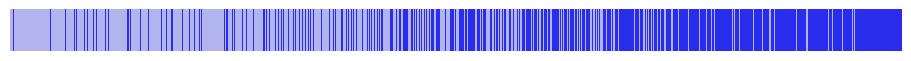

In [143]:
ax = az.plot_separation(test_predict, y=balanced_test.yes.values,y_hat="yes",figsize=(9,0.5));

Seperation plot:

The vertical lines are represented as the model predictions. Light blue is class 0 (global warming is not happening) and dark blue is class 1 (yes, it is happening). However, the position of the vertical lines represent the truth - further to the left, a person does not believe global warming and further to the right, a person does believe it is happening. 

Based on the plot, we do see light blue vertical lines towards the left and more dark blue lines to the right. This model does a decent job at predicting whether a person believes global warming is happening or not. 